<a href="https://colab.research.google.com/github/SeokjinChae/2023S-Ajou-ML/blob/main/HW2_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW2

이번 과제에서는 대출의 승인 여부(Status)를 예측하는 데이터셋을 사용합니다.
<br>
HW1에서 제공한 데이터셋과는 다른 데이터셋입니다. bb에 업로드된 train.csv를 사용하여 과제를 진행해주세요.

[원본 데이터셋 링크](https://www.kaggle.com/datasets/mirzahasnine/loan-data-set?select=loan_train.csv)

## 주의
✋ 작성한 모든 코드에 주석을 작성할 것
<br>
✋ 이번 과제에서는 보고서 제출 X, 다만 문제 풀이 파일을 제출해야 함!

## 코랩 연결 및 라이브러리 불러오기

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd

/content/drive/My Drive


In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
ls

'Colab Notebooks'/   data3.xlsx  'train(1).csv'  '데사 16조 채석진.pptx'
 data2.csv           iris.csv     train.csv      '데사개 16조 채석진.mp4'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기

In [70]:
df = pd.read_csv('./train(1).csv') # 제공된 train.csv 사용 # 환경에 맞게 path 조절 가능

In [71]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [72]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,458300,0.0,13300000,360.0,0.0,Semiurban,N


In [73]:
df.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,600.00000,564.000000
mean,5.403459e+05,1.621246e+05,1.414104e+07,342.00000,0.842199
std,6.109042e+05,2.926248e+05,8.815682e+06,65.12041,0.364878
min,1.500000e+04,0.000000e+00,0.000000e+00,12.00000,0.000000
25%,2.877500e+05,0.000000e+00,9.800000e+06,360.00000,1.000000
50%,3.812500e+05,1.188500e+05,1.250000e+07,360.00000,1.000000
75%,5.795000e+05,2.297250e+05,1.647500e+07,360.00000,1.000000
max,8.100000e+06,4.166700e+06,7.000000e+07,480.00000,1.000000


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


## 간단한 EDA

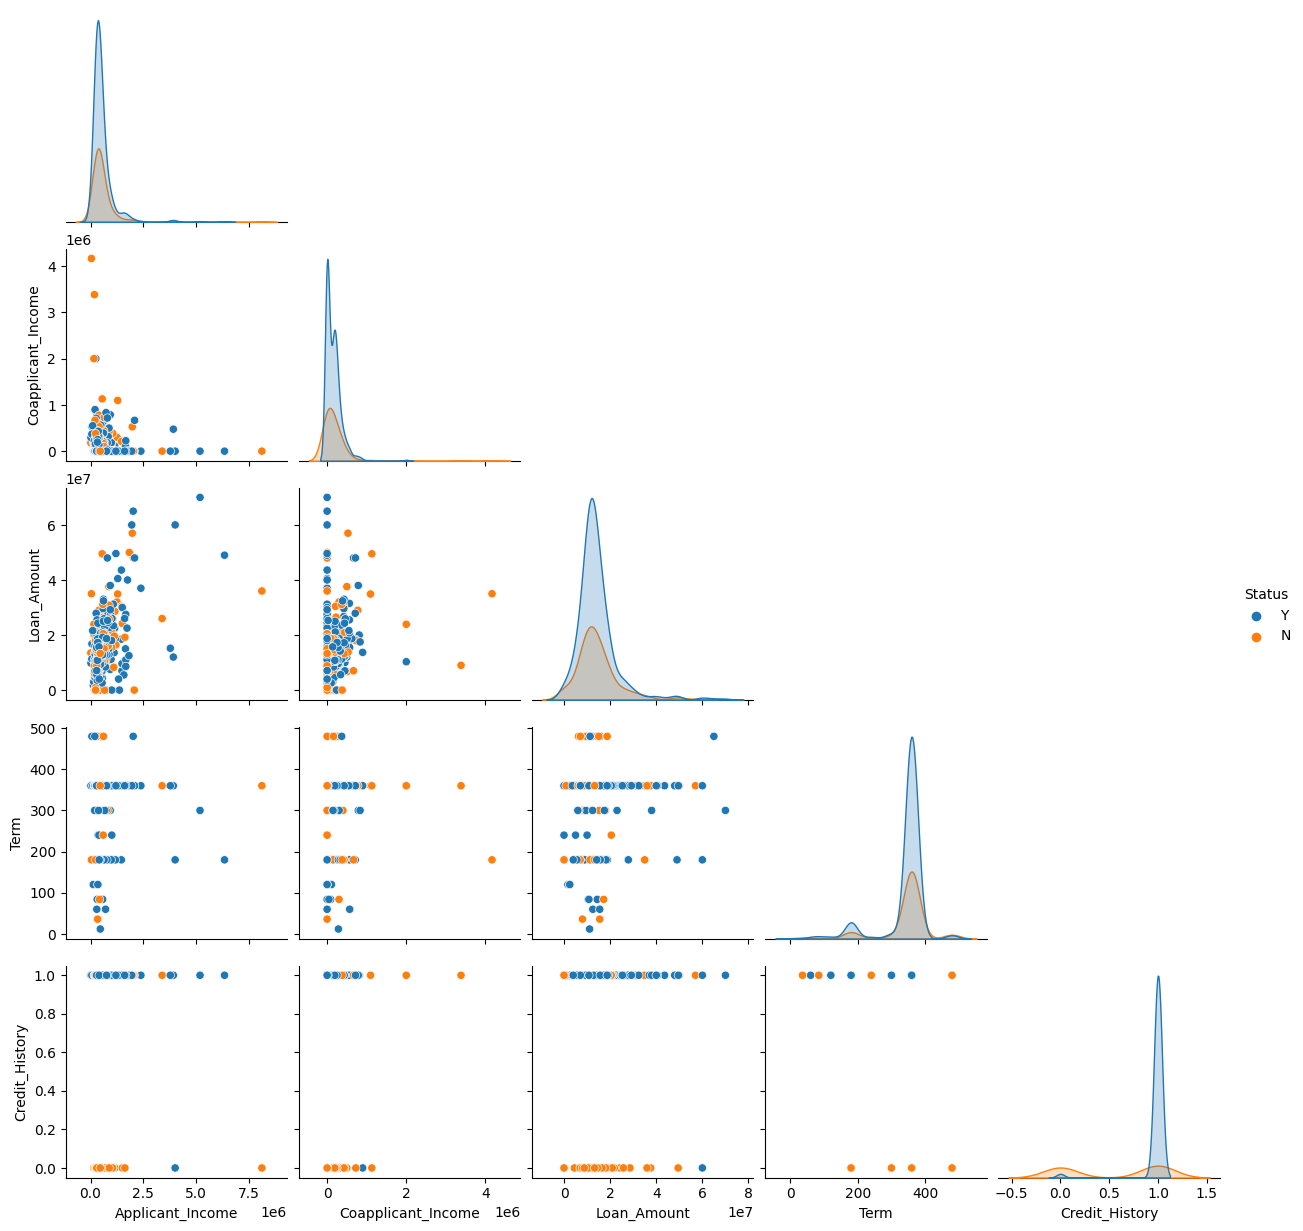

In [75]:
sns.pairplot(df,corner=True,hue='Status') # 이 데이터의 타겟 변수(예측하고자 하는 변수)는 'Status'입니다

<Axes: >

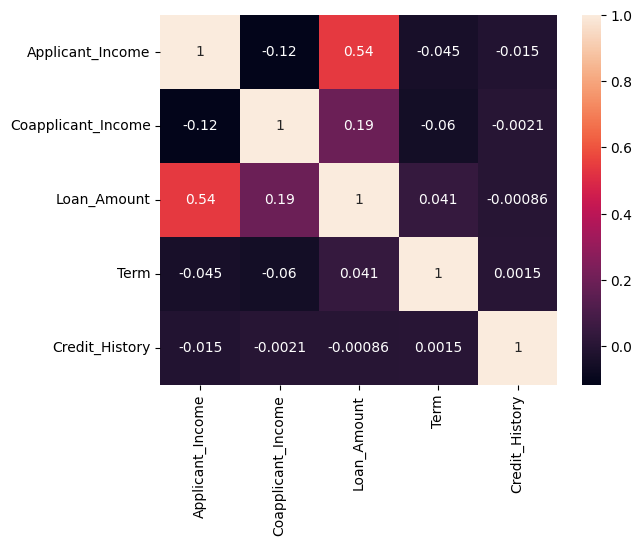

In [76]:
sns.heatmap(df.corr(),annot=True) # numerical feature들끼리의 correlation

## 결측치 확인

In [77]:
df.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

## 문제1: Categorical feature missing value drop
categorical feature에서 결측값이 있는 row를 삭제하세요.  


*   'Credit_History'열에 있는 결측값도 함께 제거합니다.

참고) sklearn 패키지에서 제공하는 imputer를 사용하면 최빈값으로 categorical feature의 결측 값도 채울 수 있으나, 편의 상 결측값이 있는 행을 삭제하겠습니다.




In [78]:
## 문제 1 ##
# 코드 작성
df.dropna(subset=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Area'], inplace=True)#dropna() 함수를 사용하여 결측값이 있는 행을 삭제
########## subset 옵션을 사용하여 열을 선택

## 문제2: Label Encoding
모든 categorical feature들을 Label Encoding하여 numerical feature로 바꾸세요.
* LabelEncoder()를 사용하세요

In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
categorical = list(df.select_dtypes(include='object').columns) # categorical features들의 column name 모음

In [81]:
## 문제 2 ##
# 코드 작성
le = LabelEncoder()
df[categorical] = df[categorical].apply(lambda x: le.fit_transform(x))
# categorical feature를 Label Encoding하여 numerical feature로 변환
##########

In [82]:
df # categorical -> numerical 로 바뀌었는지 확인

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,0,0,0,584900,0.0,15000000,360.0,1.0,2,1
1,1,1,1,0,0,458300,150800.0,12800000,360.0,1.0,0,0
2,1,1,0,0,1,300000,0.0,6600000,360.0,1.0,2,1
3,1,1,0,1,0,258300,235800.0,12000000,360.0,1.0,2,1
4,1,0,0,0,0,600000,0.0,14100000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,290000,0.0,7100000,360.0,1.0,0,1
610,1,1,3,0,0,410600,0.0,4000000,180.0,1.0,0,1
611,1,1,1,0,0,807200,24000.0,25300000,360.0,1.0,2,1
612,1,1,2,0,0,758300,0.0,18700000,360.0,1.0,2,1


## 문제 3: KNN imputer
위에서 이 데이터셋의 numberical feature에도 결측치가 있음을 확인했습니다.   
categorical feature에서는 결측치가 있는 행을 drop하였지만 numerical feature 중 결측치가 있는 'Term'열에 대해서 KNN imputer를 사용하여 결측치를 채워봅시다.


* categorical feature와 imputer를 적용하려고 하는 feature(term)를 제외하고, 나머지 numerical feature에 대해서 normalization을 수행한 다음 imputation을 진행해주세요. (imputation을 할 때에만 normalized된 feature들을 사용합니다)
* **주의)** 'Credit_History'는 categorical feature로 간주하여야 합니다.
* term의 결측치를 채울 때에는 'normalized_df'를 사용하고 원본 데이터프레임의 'term' 열만 knn imputer로 결측치를 채운 'term'열로 변경합니다.
* 문제3번 이후 문제에서는 term의 결측치를 채운 변경된 df를 이용합니다.



In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# numeric feature들의 normalization
numeric_cols = ['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount']
scaler = StandardScaler()
normalized_df = df.copy()
normalized_df[numeric_cols] = scaler.fit_transform(normalized_df[numeric_cols])

# knn imputer를 사용하여 결측치를 채움
imputer = KNNImputer()
imputed_df = pd.DataFrame(imputer.fit_transform(normalized_df.drop(columns=['Term'])), columns=normalized_df.drop(columns=['Term']).columns)

# 결측치를 채운 'term' 열만 추출하여, 원본 데이터프레임의 'term'열로 변경
imputed_term = pd.DataFrame(imputer.fit_transform(normalized_df[['Term']]), columns=['Term'])
df['Term'] = imputed_term['Term']

### 문제 3-1
주어진 코드틀에 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하는 코드를 작성하세요.  
* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.
* 참고) 거리를 구할 때 데이터에 null 값이 있으면 거리가 nan으로 계산이 됩니다. 따라서 null인 데이터가 있는 행을 제외하고 거리를 계산하거나 모든 거리를 계산하고 nan 을 가진 데이터는 k개를 고를 때 제외해주시면 됩니다.

### 문제 3-2
주어진 코드틀에서 k개의 값을 보고 평균을 내어 결측값을 결정하는 코드를 작성하세요.
* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.

In [84]:
import tqdm

In [85]:
class Knn_imputer():
  def __init__(self, n_neighbors): 
        
    ## 생성자로 최근접 이웃수(n_neighbors)를 입력 받습니다.
    self.k = n_neighbors    
  
  ## knn 은 lazy learning 입니다.
  def fit(self,X):
      self.X = X
  
  def predict(self, X, feat_name): # feat_name: KNN imputer를 사용하려는 feature 명

    for i in tqdm.tqdm(range(len(X))):
     if pd.isnull(X[feat_name].iloc[i]): # feat_name 열에 있는 결측값 확인

        distance = self.dist(X, X.iloc[i], feat_name) # 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하는 함수
      
        
        sorted_dist = sorted(distance.items(), key=lambda x: x[1]) # distance 를 sorting 하기

         ################  문제 3-2  ####################
         # k개의 "feat_name" 값을 보고 평균 내어 값을 결정하기
         # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
         # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
        ################ 코드 시작  #####################
        knn_values = [] # knn 값들을 저장할 빈 리스트 생성
        for j in range(min(self.k, len(sorted_dist)-1)):# 가장 가까운 이웃부터 k개까지의 이웃 데이터를 탐색
          value = X.iloc[sorted_dist[j+1][0]][feat_name]#탐색한 이웃 데이터 중 j번째 이웃 데이터의 feat_name열 값을 가져옴
          if pd.notnull(value): #결측이 아니면 knn_values 리스트에 추가
            knn_values.append(float(value)) 
        if knn_values: #knn_values 리스트에 값이 있다면 이웃 데이터의 feat_name 열 값의 평균을 구함
          predicted_value = np.mean(knn_values)
        else: #리스트에 값이 없으면 결측값으로 대체
          predicted_value = np.nan 
        X[feat_name].iloc[i] = predicted_value #결측값이 있던 해당 행의 feat_name열 값을 predicted_value로 대체

        ################ 코드 끝  ######################
        ##############################################
        
  
  def dist(self, X, y, feat_name): # feat_name: KNN imputer를 사용하려는 feature 명
    num_train = X.shape[0]

    X = X.drop([feat_name], axis=1)
    y = y.drop([feat_name])
    dist_dict = {} ## {index : distance} 형태

    for i in range(num_train):
    
    ################  문제 3-1  ####################
    # 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하기
    # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
    # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
    ################ 코드 시작  #####################
      if pd.isnull(X.iloc[i]).sum() == 0 and pd.notnull(y).all():
        dist_dict[i] = np.sqrt(sum((X.iloc[i] - y)**2))   #데이터 프레임의 i번째 행이 모든 열에서 결측값을 가지고 있지 않고, y 데이터 프레임의 모든 열이 결측값이 아닐 때 실행
    ################ 코드 끝  ######################
    ##############################################
    return dist_dict


In [86]:
# 아래 숫자는 변경하셔도 상관 없습니다.
imputer = Knn_imputer(3)
imputer.fit(df)

# test set에 대해 predict를 진행합니다.
imputer.predict(df, 'Term')

  0%|          | 0/511 [00:00<?, ?it/s]<ipython-input-85-d7e5acfc9c70>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feat_name].iloc[i] = predicted_value #결측값이 있던 해당 행의 feat_name열 값을 predicted_value로 대체
 83%|████████▎ | 426/511 [00:00<00:00, 1203.34it/s]<ipython-input-85-d7e5acfc9c70>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feat_name].iloc[i] = predicted_value #결측값이 있던 해당 행의 feat_name열 값을 predicted_value로 대체
<ipython-input-85-d7e5acfc9c70>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

In [87]:
df.isnull().sum() # 결측치가 채워졌는지 확인

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
dtype: int64

## 문제 4: correlation
DataFrame df에 대해서 correlation heatmap을 그린 후, Status에 가장 영향을 주는 feature는 무엇인지 서술하세요

* Status에 가장 영향을 주는 feature에 대한 서술
: 아래 코드를 실행하면 df의 모든 feature들 간의 상관관계가 히트맵으로 나타나게 됩니다. 상관계수는 -1에서 1사이의 값을 가지며, 1에 가까울수록 강한 양의 상관관계를, -1에 가까울수록 강한 음의 상관관계를 나타냅니다.따라서 Credit_History가 Status에 가장 영향을 주는 feature입니다.

<Axes: >

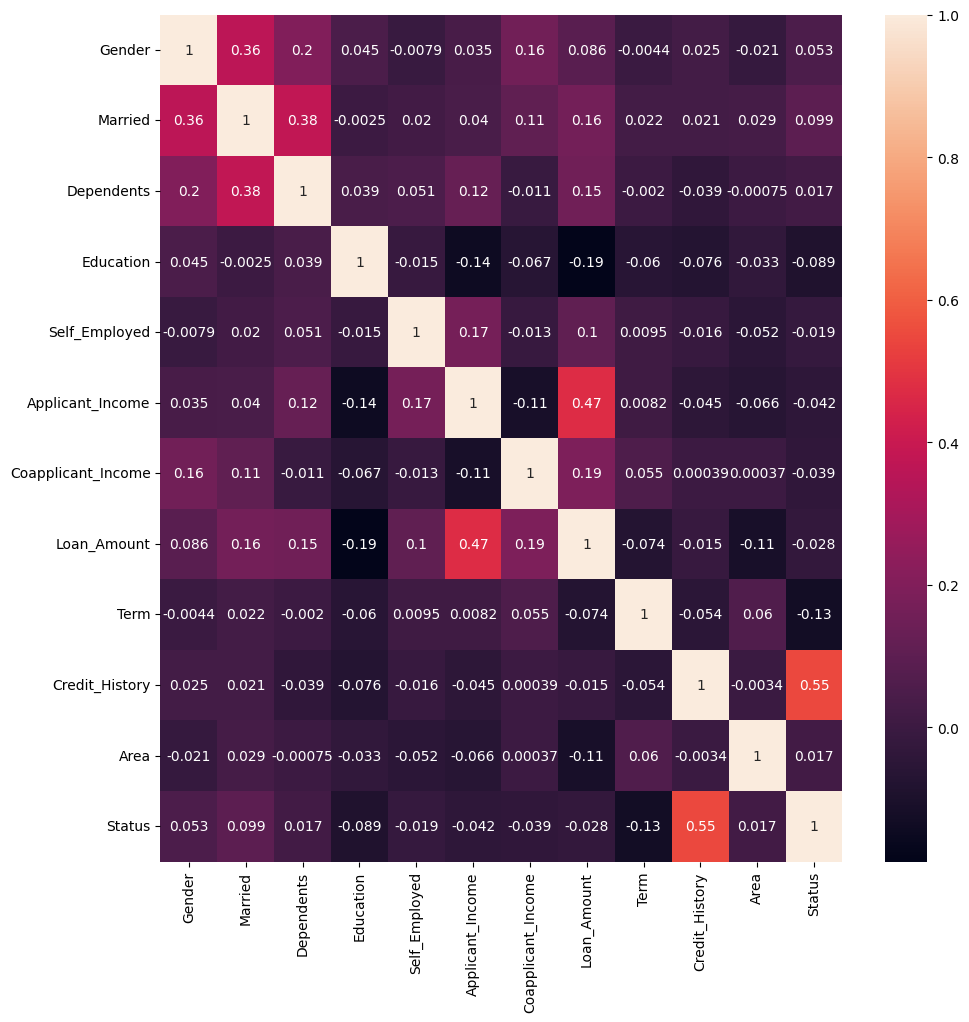

In [88]:
plt.figure(figsize = (11,11)) # figure 사이즈 조절

## 문제 4 ##
# 코드 작성
sns.heatmap(df.corr(),annot=True)
############

## 데이터 나누기

### **주의 사항**
train_test_split에 random seed를 사용하여 split set을 고정한다.
- 모든 문제에 같은 random seed를 부여할 필요는 없다.

In [89]:
from sklearn.model_selection import train_test_split

X = df.drop('Status', axis=1) # target feature가 Status(대출의 승인 여부)
y = df['Status']
y=y.astype('int')
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9)

print("X_train's shape : ", X_train.shape)
print("y_train's shape : ", y_train.shape)
print("\nX_val's shape : ", X_val.shape)
print("y_val's shape : ", y_val.shape)
print("\nX_test's shape : ", X_test.shape)
print("y_test's shape : ", y_test.shape)

X_train's shape :  (408, 11)
y_train's shape :  (408,)

X_val's shape :  (51, 11)
y_val's shape :  (51,)

X_test's shape :  (52, 11)
y_test's shape :  (52,)


## 문제5: KNN



- Scikit-learn 라이브러리를 이용하여 KNN의 최적의 파라미터를 찾는다.
    - 최근접 이웃을 찾기 위한 거리의 종류로 최소한 두 가지 이상의 거리 척도를 사용한다.
    - K값을 최소 3개 이상 비교한다.
    - 거리 척도, k값에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 k값, y축 정확도)
    - 찾은 최적의 파라미터와 test set 이용하여 test_accuracy 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

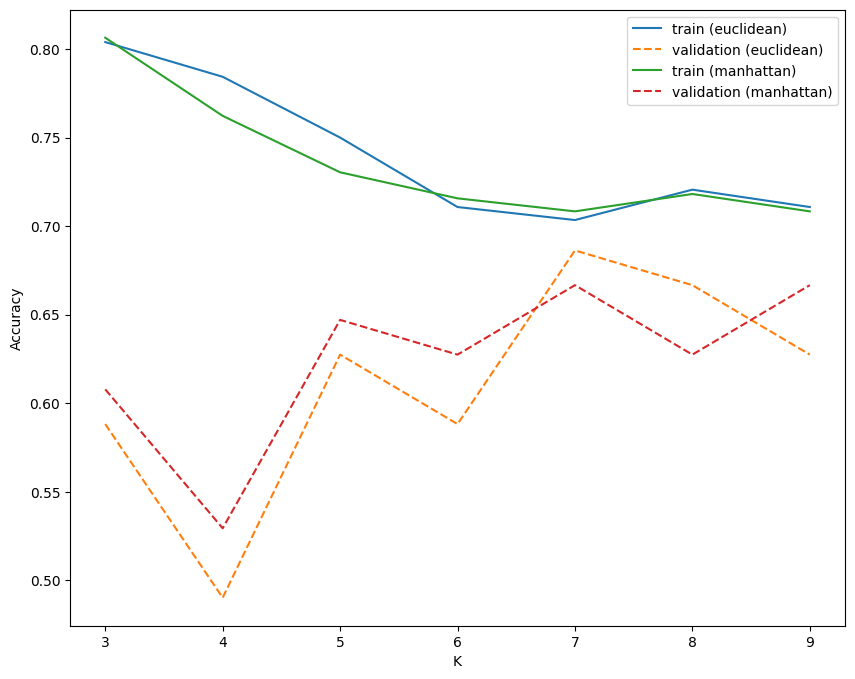

Test Accuracy: 0.5962


In [95]:
### 문제 1 ###
### 코드 작성 ###

# 거리 척도와 K값 범위 설정
distance_metrics = ['euclidean', 'manhattan']
k_range = range(3, 10)

# 결과를 저장할 리스트 생성
train_accuracy = []
val_accuracy = []

# 모든 거리 척도와 K값에 대해 반복하여 정확도 계산
for distance in distance_metrics:
    train_acc = []
    val_acc = []
    for k in k_range:
        # KNN 분류기 생성
        knn = KNeighborsClassifier(n_neighbors=k, metric=distance)
        # train set으로 학습
        knn.fit(X_train, y_train)
        # train set의 정확도 계산
        train_acc.append(metrics.accuracy_score(y_train, knn.predict(X_train)))
        # validation set의 정확도 계산
        val_acc.append(metrics.accuracy_score(y_val, knn.predict(X_val)))
    # 결과 저장
    train_accuracy.append(train_acc)
    val_accuracy.append(val_acc)

# 그래프 그리기
plt.figure(figsize=(10,8))
for i in range(len(distance_metrics)):
    plt.plot(k_range, train_accuracy[i], label="train ({})".format(distance_metrics[i]))
    plt.plot(k_range, val_accuracy[i], '--', label="validation ({})".format(distance_metrics[i]))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# test set의 정확도 계산
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn.fit(X_train, y_train)
test_accuracy = metrics.accuracy_score(y_test, knn.predict(X_test))
print("Test Accuracy: {:.4f}".format(test_accuracy))

################

**설명 작성**  
- 최적의 파라미터:  k=7, 거리 척도는 'euclidean'
- 설명: 검증 데이터셋에서 가장 높은 정확도를 얻을 수 있기 때문, train과 vaild가 가장 가까움

## 문제6 Cross validation with Linear SVM
### 6-1: k-fold
- 수업시간에 배운 **5-fold** 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
    - C 이외의 하이퍼파라미터는 임의로 설정 가능
    - **5-fold CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
    - 파라미터에 따라 K-fold CV를 통해 나온 평균 정확도와 각 fold의 정확도들을 한 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

### 6-2: Leave One Out
- 수업시간에 배운 Leave-One-Out 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
  - C 이외의 하이퍼파라미터는 임의로 설정 가능
  - **Leave-One-Out CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
  - 파라미터에 따라 Leave-One-Out CV를 통해 나온 평균 정확도를 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
  - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
  - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

In [96]:
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

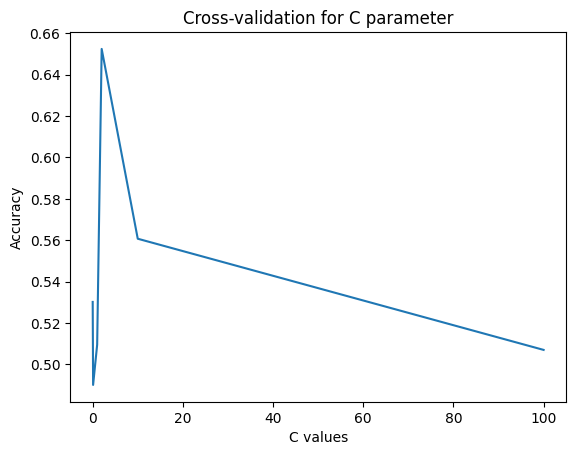

best C: 2
Test accuracy: 0.6538461538461539


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [99]:
## 문제 6-1 ##
# 코드 작성

# 5-fold cross-validation 수행
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
c_values = [0.01, 0.1, 1, 2, 10, 100]
mean_scores = []
for c in c_values:
    model = LinearSVC(C=c)
    scores = cross_val_score(model, X_train, y_train, cv=kfold)
    mean_scores.append(scores.mean())

# 그래프 그리기
plt.plot(c_values, mean_scores)
plt.xlabel('C values')
plt.ylabel('Accuracy')
plt.title('Cross-validation for C parameter')
plt.show()

# 최적의 C 값 찾기
best_c = c_values[np.argmax(mean_scores)]
print('best C:',best_c)

# 최적의 C 값으로 모델 학습
model = LinearSVC(C=best_c)
model.fit(X_train, y_train)

# test set으로 모델 평가
test_accuracy = model.score(X_test, y_test)
print('Test accuracy:', test_accuracy)

############

**설명 작성**  
- 최적의 파라미터:C =2
- 설명:그래프에서 c는 2일때 가장 accuracy가 높다.

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

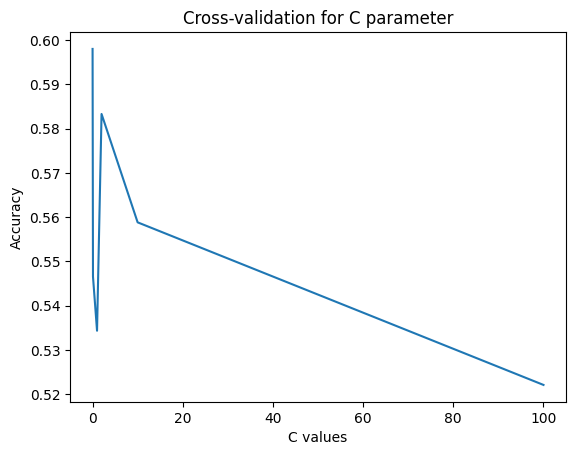

best c: 0.01
Test accuracy: 0.34615384615384615


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [100]:
## 문제 6-2 ##
# 코드 작성

# Leave-One-Out cross-validation 수행
loo = LeaveOneOut()
c_values = [0.01, 0.1, 1, 2, 10, 100]
mean_scores = []
for c in c_values:
    model = LinearSVC(C=c)
    scores = cross_val_score(model, X_train, y_train, cv=loo)
    mean_scores.append(scores.mean())

# 그래프 그리기
plt.plot(c_values, mean_scores)
plt.xlabel('C values')
plt.ylabel('Accuracy')
plt.title('Cross-validation for C parameter')
plt.show()

# 최적의 C 값 찾기
best_c = c_values[np.argmax(mean_scores)]
print('best c:',best_c)

# 최적의 C 값으로 모델 학습
model = LinearSVC(C=best_c)
model.fit(X_train, y_train)

# test set으로 모델 평가
test_accuracy = model.score(X_test, y_test)
print('Test accuracy:', test_accuracy)
############

**설명 작성**  
- 최적의 파라미터:C=0.01
- 설명:그래프에서 c는 0.01일때 가장 accuracy가 높다.

## 문제7 Cross validation with SVM
### 7-1: k-fold
- 문제6-1 코드에서 kernel을 바꾸어 k-fold를 진행하세요
- C는 2로 설정하고 k=5로 설정합니다.

### 7-2: Leave One Out
- 문제6-2 코드에서 kernel을 바꾸어 Leave one out를 진행하세요
- C는 2로 설정합니다.

### 7-3: 데이터의 특성
문제 6의 결과와 7-1, 7-2의 결과를 비교하여 보았을 때 주어진 데이터는 어떤 관계인지 (선형, 비선형)인지 적고, 왜 그런지 그 이유를 서술하세요


In [101]:
## 문제 7-1 ##
# 코드 작성
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# 모델 정의
svm = SVC(C=2, kernel='rbf')

# 5-fold CV 수행 및 정확도 출력
scores = cross_val_score(svm, X, y, cv=kf)
print("Accuracy with 5-fold CV:", scores.mean())

############

Accuracy with 5-fold CV: 0.6751189796306873


In [102]:
## 문제 7-2 ##
# 코드 작성

# Leave-One-Out cross-validation 수행
leaveoneout = LeaveOneOut()

# 모델 정의
svm = SVC(C=2, kernel='rbf')

# Leave One Out CV 수행 및 정확도 출력
scores = cross_val_score(svm, X, y, cv=leaveoneout)
print("Accuracy with LOO CV:", scores.mean())
############

Accuracy with LOO CV: 0.6731898238747553


**7-3 설명 작성**  
- 설명: 데이터가 선형적인 관계를 가진다.왜냐하면 k-fold 교차 검증은 전체 데이터를 무작위로 k개의 서로 겹치지 않는 부분 집합으로 분할하여 각각에 대해 모델을 학습하고 검증하는 방법이기 때문에, 데이터의 분포와 상관 없이 모든 부분 집합에서 유사한 검증 결과를 얻을 수 있습니다. 반면 Leave One Out 교차 검증은 전체 데이터 중 하나의 데이터 포인트만을 테스트 셋으로 사용하는 방법으로, k-fold 교차 검증보다 테스트 셋에 더 많은 정보가 들어있어 결과에 더 민감하다.따라서 k-fold와 Leave One Out 교차 검증의 결과가 크게 차이나지 않는다면, 이는 데이터가 선형적인 관계를 가진다는 것을 의미한다.

## 문제 8: Grid search
### 문제 8-1
주어진 param_grid에 대해서 RandomForestClassifier에 GridSearch cross validation(cv=5)을 수행하는 코드를 작성하고 best hyperparameter를 출력하세요.  
* 아래의 주어진 패키지를 사용합니다.



In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [104]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [105]:
## 문제 8-1 ##
## 코드 작성 ##
rf = RandomForestClassifier(random_state=42) # RandomForestClassifier 객체 생성
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5) # GridSearchCV 객체 생성
grid_search.fit(X_train, y_train)# GridSearchCV를 이용하여 학습

print("Best hyperparameters: ", grid_search.best_params_) # 최적의 hyperparameter 출력

############

Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 200}


### 문제 8-2
8-1에서 구한 best parameter를 사용하여 최종적인 RandomForestClassifier를 만든 후 train 데이터로 학습 후, `accuracy_score`를 사용하여 test accuracy를 출력하세요.

In [106]:
from sklearn.metrics import accuracy_score

In [107]:
## 문제 8-2 ##
## 코드 작성 ##
# 최적 하이퍼파라미터로 RandomForestClassifier 객체 생성
rfc = RandomForestClassifier(**grid_search.best_params_)

# train data로 모델 학습
rfc.fit(X_train, y_train)

# Test 데이터로 예측
y_pred = rfc.predict(X_test)

# accuracy score계산
acc = accuracy_score(y_test, y_pred)

print("Test accuracy:", acc)
############

Test accuracy: 0.75
